In [1]:
import sys
import os

# Get the absolute path of the project root (adjust as needed)
project_root = os.path.abspath("../..")  # Moves one level up to project root

# Add to sys.path if not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [5]:
from processors.circuit_diagram_processor import process_circuit_diagrams
from processors.io_mapping_processor import process_io_mapping
from processors.dtc_specifications_processor import process_dtc_specifications
from processors.system_information_processor import process_system_information

openai_api_key: EMPTY
openai_api_base: http://localhost:9000/v1
export_template_path: ./outflow/templates
qdrant_host: localhost
qdrant_port: 6333
neo4j_connection: bolt://localhost:7687
neo4j_user: neo4j
neo4j_password: ********
Neo4j Connection Successful


In [6]:
from exporters.export_circuit_data import export_circuit_data
from exporters.export_dtc_data import export_dtc_data

In [3]:
from processors.function_parameters.function_parameter_processor import process_function_parameters
from processors.function_parameters.function_group_processor import process_function_groups
from processors.function_parameters.function_tree_processor import process_function_tree

In [9]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from state import State


def export_artifacts(state: State):
    pass


def route_inference_process(state: State):
    if state.inference_type == "io_processing":
        return "io_processing"
    elif state.inference_type == "function_parameter_processing":
        return "function_parameter_processing"


# Build the graph
builder = StateGraph(State)

# nodes of the io_processing
builder.add_node("process_circuit_diagrams", process_circuit_diagrams)
builder.add_node("process_io_mapping", process_io_mapping)
builder.add_node("process_dtc_specifications", process_dtc_specifications)
builder.add_node("process_system_information", process_system_information)
builder.add_node("export_circuit_data", export_circuit_data)
builder.add_node("export_dtc_data", export_dtc_data)
builder.add_node("export_artifacts", export_artifacts)

# nodes of the function_parameter_processing
builder.add_node("process_function_parameters", process_function_parameters)
builder.add_node("process_function_groups", process_function_groups)
builder.add_node("process_function_tree", process_function_tree)


builder.add_conditional_edges(
    START,
    route_inference_process,
    {
        "io_processing": "process_circuit_diagrams",
        "function_parameter_processing": "process_function_parameters",
    },
)
# path of io_processing
builder.add_edge("process_circuit_diagrams", "process_system_information")
builder.add_edge("process_system_information", "process_io_mapping")
builder.add_edge("process_io_mapping", "export_circuit_data")
builder.add_edge("export_circuit_data", "process_dtc_specifications")
builder.add_edge("process_dtc_specifications", "export_dtc_data")
builder.add_edge("export_dtc_data", "export_artifacts")

# path of function_parameter_processing
builder.add_edge("process_function_parameters", "process_function_groups")
builder.add_edge("process_function_groups", "process_function_tree")
builder.add_edge("process_function_tree", "export_artifacts")
# Final export artifacts
builder.add_edge("export_artifacts", END)
graph = builder.compile()

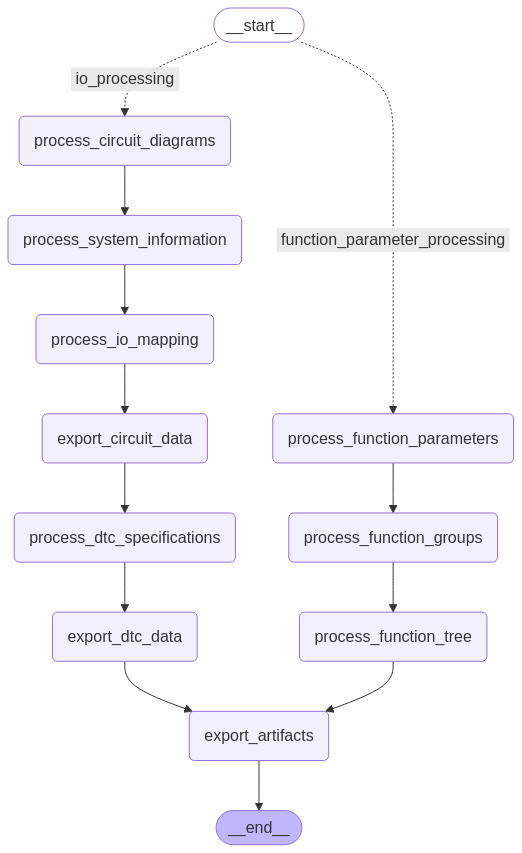

In [10]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)